# sprint 論文読解入門

### 全体スキーム
http://www.telesens.co/2018/03/11/object-detection-and-classification-using-r-cnns/

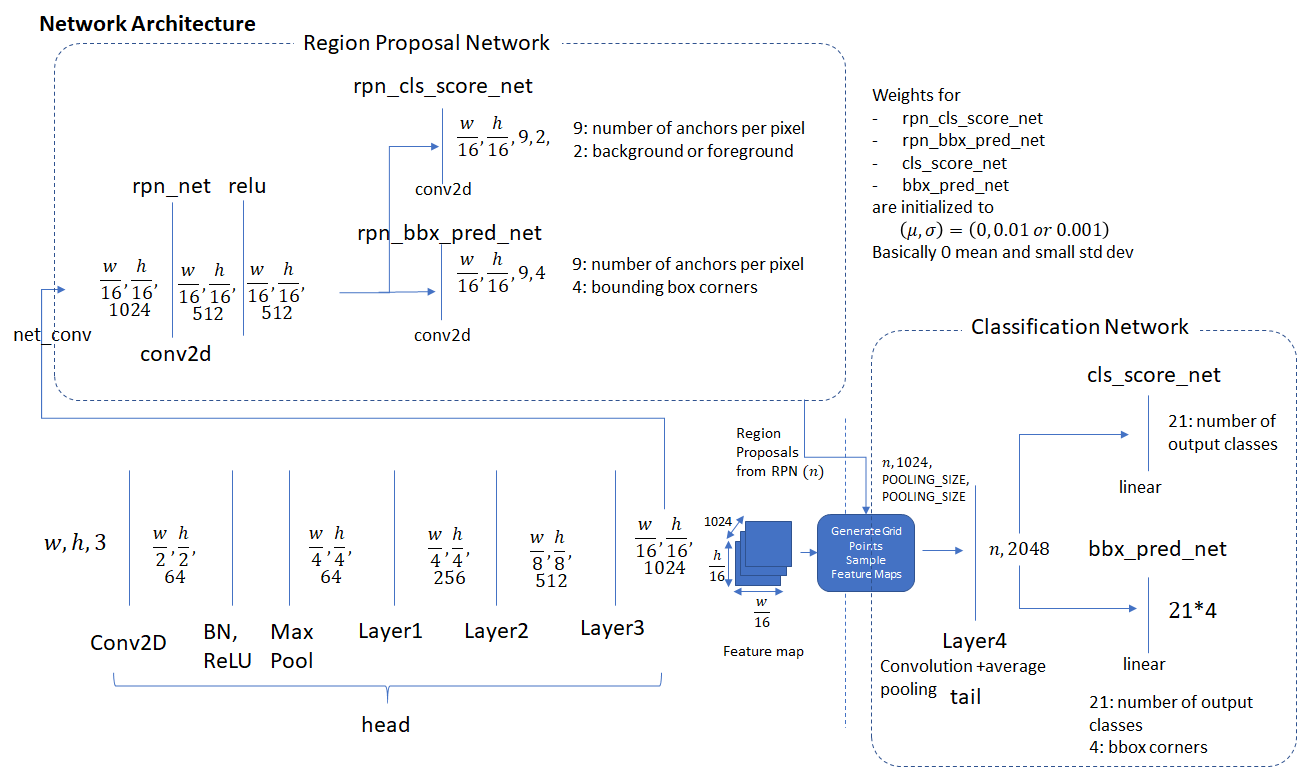

# 問題
それぞれについてJupyter Notebookにマークダウン形式で記述してください。

### 条件
* 答える際は論文のどの部分からそれが分かるかを書く。
* 必要に応じて先行研究（引用されている論文）も探しにいく。最低2つは他の論文を利用して回答すること。
* 論文の紹介記事を見ても良い。ただし、答えは論文内に根拠を探すこと。

## (1) 物体検出の分野にはどういった手法が存在したか。
2 RELATED WORKから  
R-CNN、Fast R-CNN、 SPP

## (2) Fasterとあるが、どういった仕組みで高速化したのか。
3 FASTER R-CNNから  
Fast R-CNNの前に完全畳み込み層（例：VGG16）による物体検知を導入する事で高速化した。
以前は領域検出にSelective Searchを行っていたが計算コストが高かった。それをCNNに置き換えた。

## (3) One-Stageの手法とTwo-Stageの手法はどう違うのか。
4.1 Experiments on PASCAL VOC,  
One-Stage Detection vs. Two-Stage Proposal + Detectionから  
* One-Stage：一つの検出器で物体領域検出とクラス分類を同時に行う
* Two-Stage：一つ目の検出器で物体領域を特定し、二つ目の検出器でクラス分類を行う。つまり、一つ目の検出器はクラスとは無関係。  
→今回の論文で言うとRPNが一つ目の検出器。

## (4) RPNとは何か。
3.1 Region Proposal Networksから  
完全畳み込み層（この論文では ZFnetやVGG16）から得た特徴マップに対し、各ピクセルをAnchorとしn✖︎nの畳み込みを実施する。(この論文ではn = 3)  
各々のAnchorに対し k 個のAnchor Boxを割り当てる。（この論文ではk = scle:3✖︎aspect:3）  
「各Anchor Boxに対する予測値」と「Anchor Box」の差、「ground truthと最も近いAnchor Box」と「ground truth」の差を算出し、それぞれの差を近づけるように学習することで「分類」から「物体検知」、「回帰」から「領域(四角)」を得る。  
この時のターゲット変数は、分類の場合はの背景 or 物体（0 or 1）、回帰の場合はx, y, h, wのズレ。各アンカー毎に重みは共有されている。   
　＊「分類」と「回帰」には1✖︎１畳み込みを行いチャネル数を調整する。   

分類では２クラスの log loss、 回帰では robust L1 loss を使用する。

### RPN
http://www.telesens.co/2018/03/11/object-detection-and-classification-using-r-cnns/

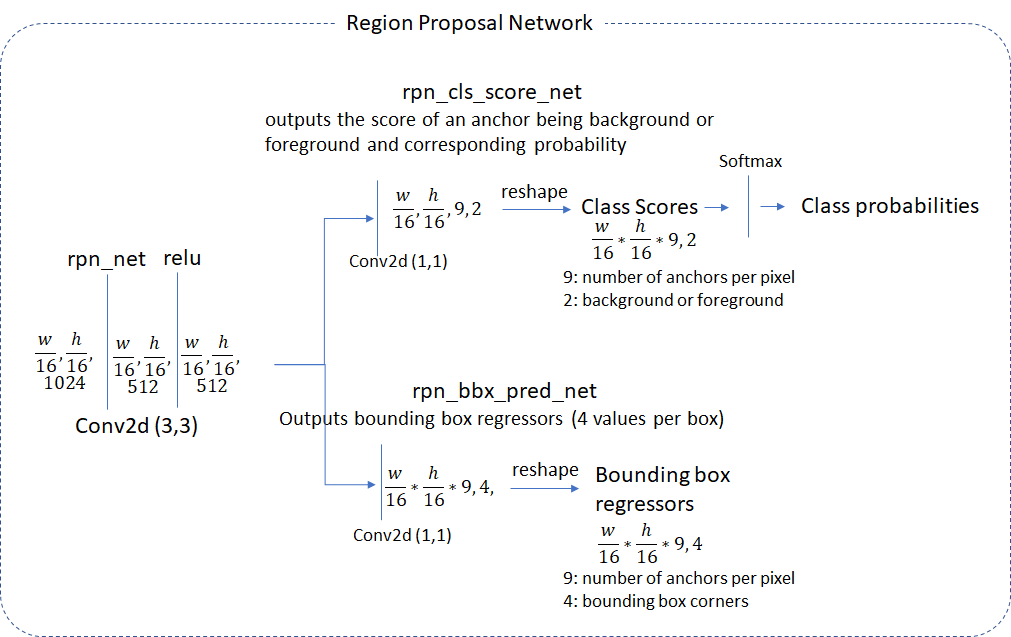

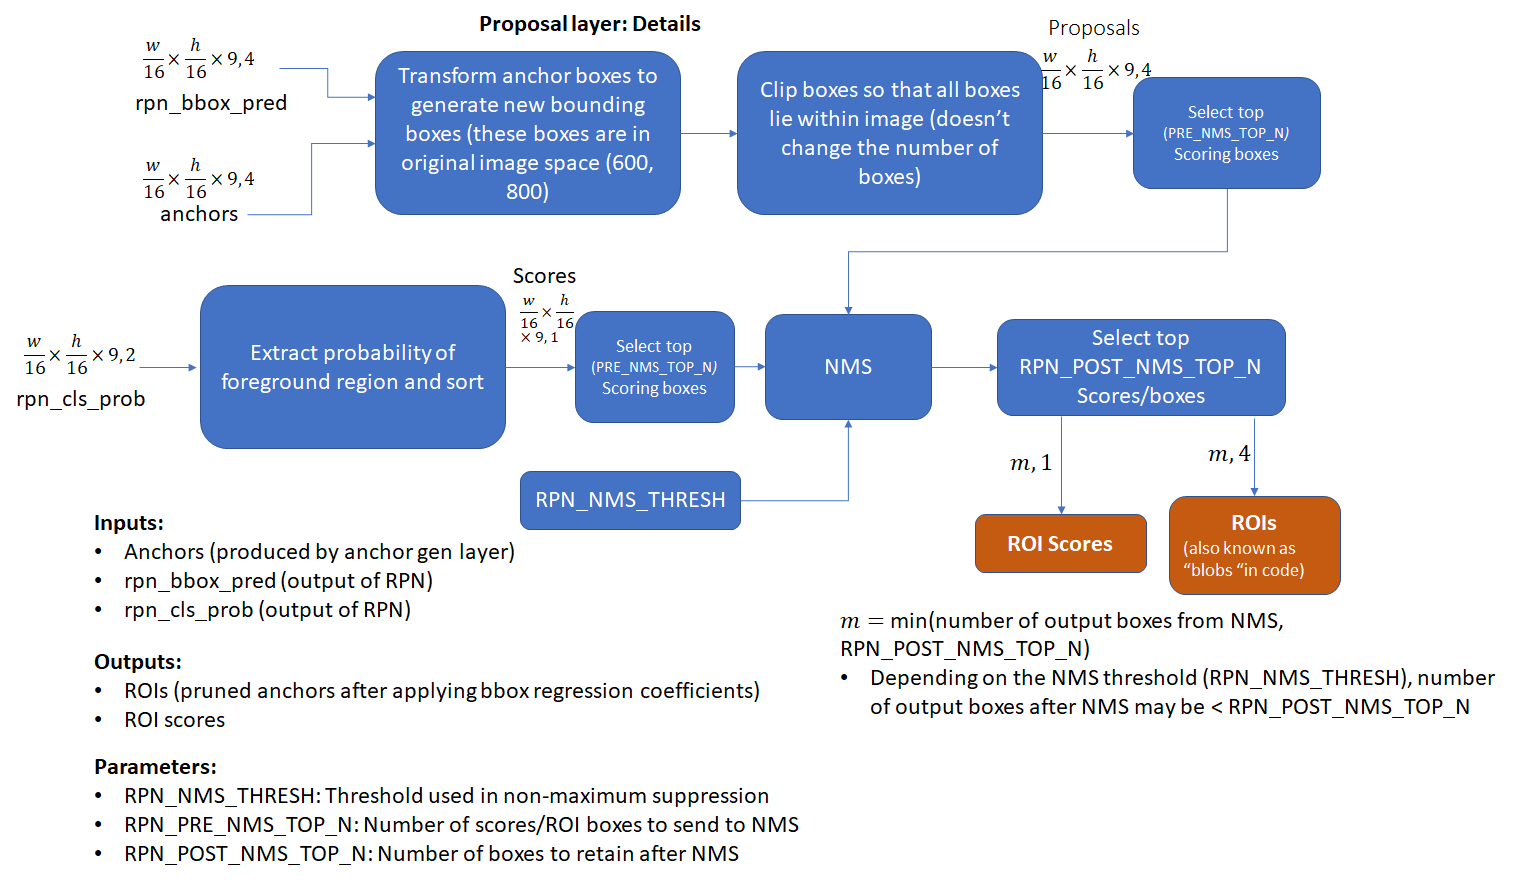

### 回帰に使用するターゲット変数
3.1.2 Loss Function

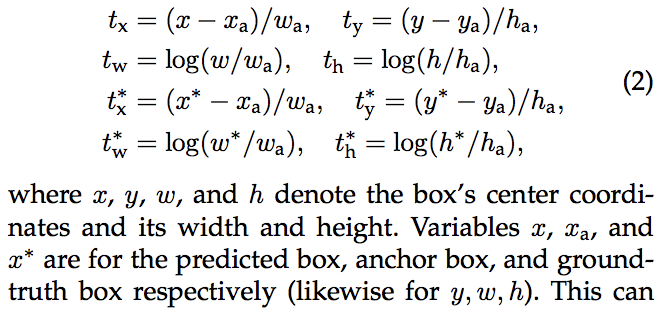

### robust L1 loss
[2]Fast R-CNN,  2.3. Fine-tuning for detection

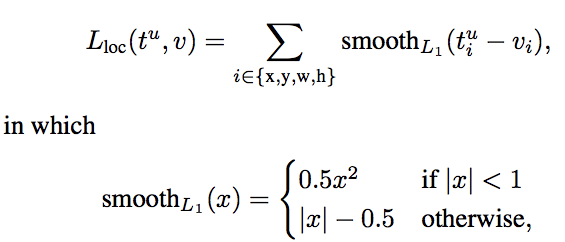

## (5) RoIプーリングとは何か。
[1]Spatial pyramid pooling in deep convolutional networks for visual recognition, 2.2 The Spatial Pyramid Pooling Layer、および  [2]Fast R-CNN, 2.1. The RoI pooling layerから  
領域検出された箇所に対し最大プーリングを行う。処理後のサイズは任意の大きさに決めることができる。  
例えば、領域検出された箇所が複数存在し大きさがバラバラであっても、指定したサイズに出力される。  
各領域が同じサイズになるため、どの領域も最後の全結合に通すことができる。

[1]Spatial pyramid pooling in deep convolutional networks for visual recognition  
2.2 The Spatial Pyramid Pooling Layer

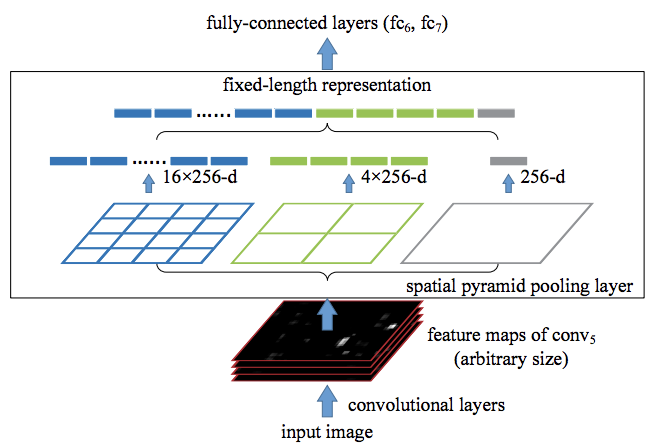  

## (6) Anchorのサイズはどうするのが適切か。
4 EXPERIMENTS, Sensitivities to Hyper-parametersから  
単一の同じスケールの場合、アスペクト比は多い方が良い結果。  
単一のスケールの場合、スケールの違いによって評価結果は変化しない。  
同じスケールでもアスペクト比が多い方が結果がよい。

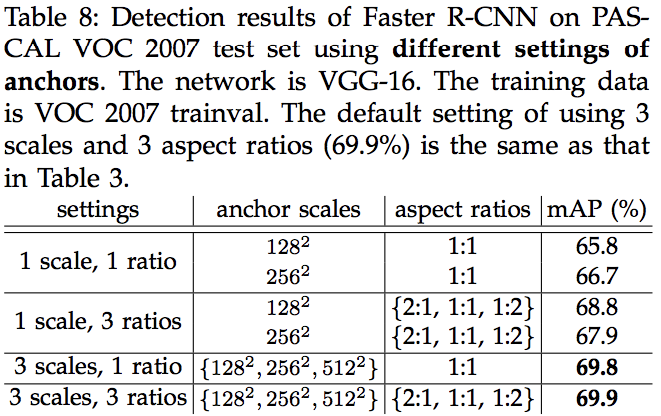

## (7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか。
 * データセット：PASCAL VOC 2007、PASCAL VOC 2012、MS COCO  
 →PASCAL VOCのクラスは２０、MS COCOのクラスは８０
 * 評価指標：mAP（mean Average Precision）  
 →ラベル毎にConfidence Score（Bounding Boxに物体が存在する確率）を算出。 
 Confidence Score毎にソートしIoUからTrue or False を決め、PrecisionとRecall算出。  
 Recallを横軸、Precisionを縦軸としたグラフを作成し積分。  （AP）
 APをクラス数で割ったものがmAP。

### Confidence Score
Advanced Computing and Systems for Security: Volume Twelve

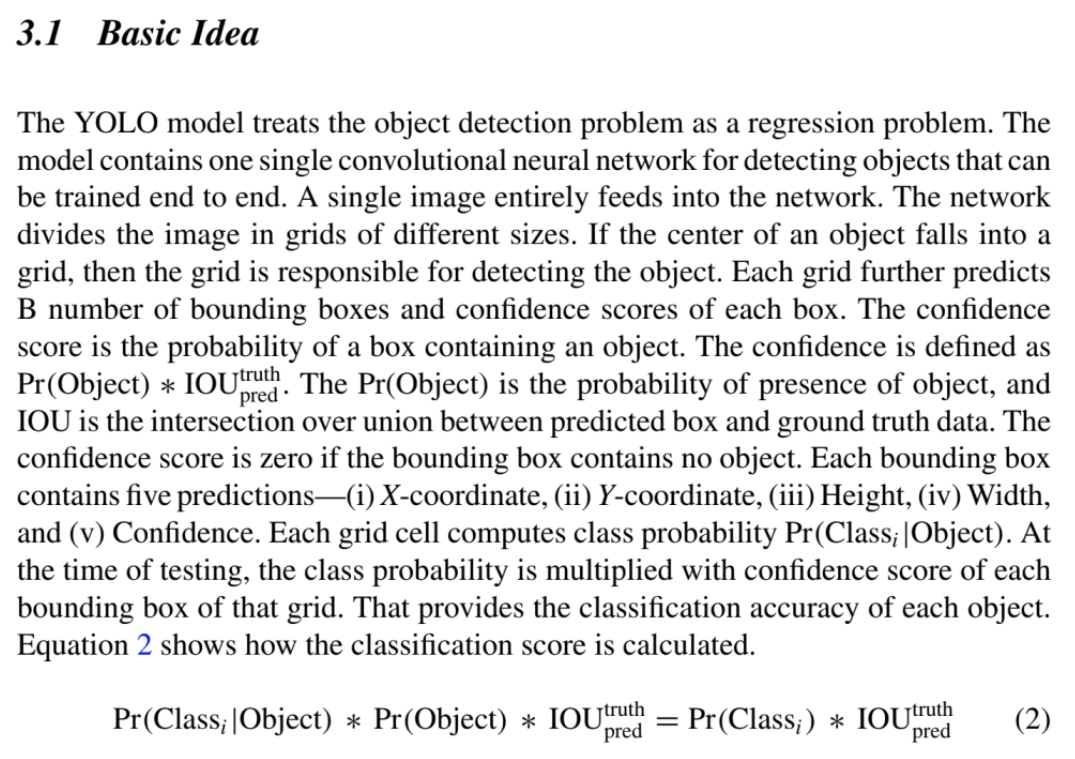

### IoU、mAP
https://qiita.com/mdo4nt6n/items/08e11426e2fac8433fed

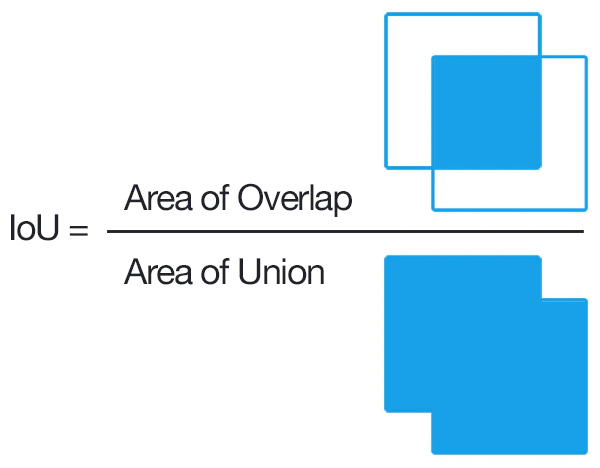

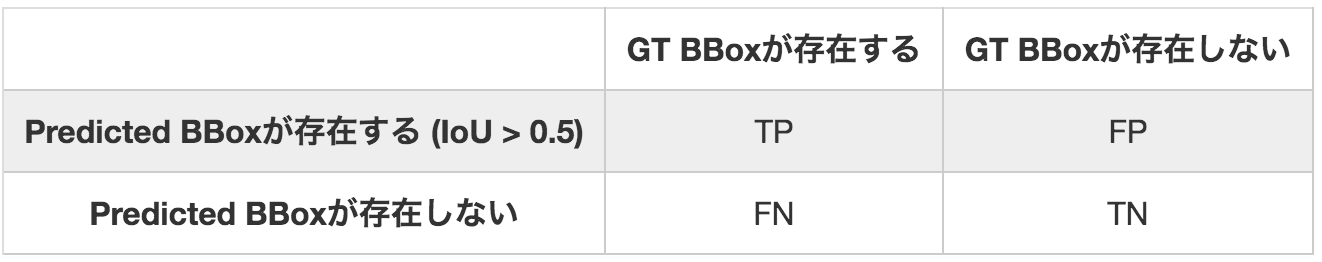

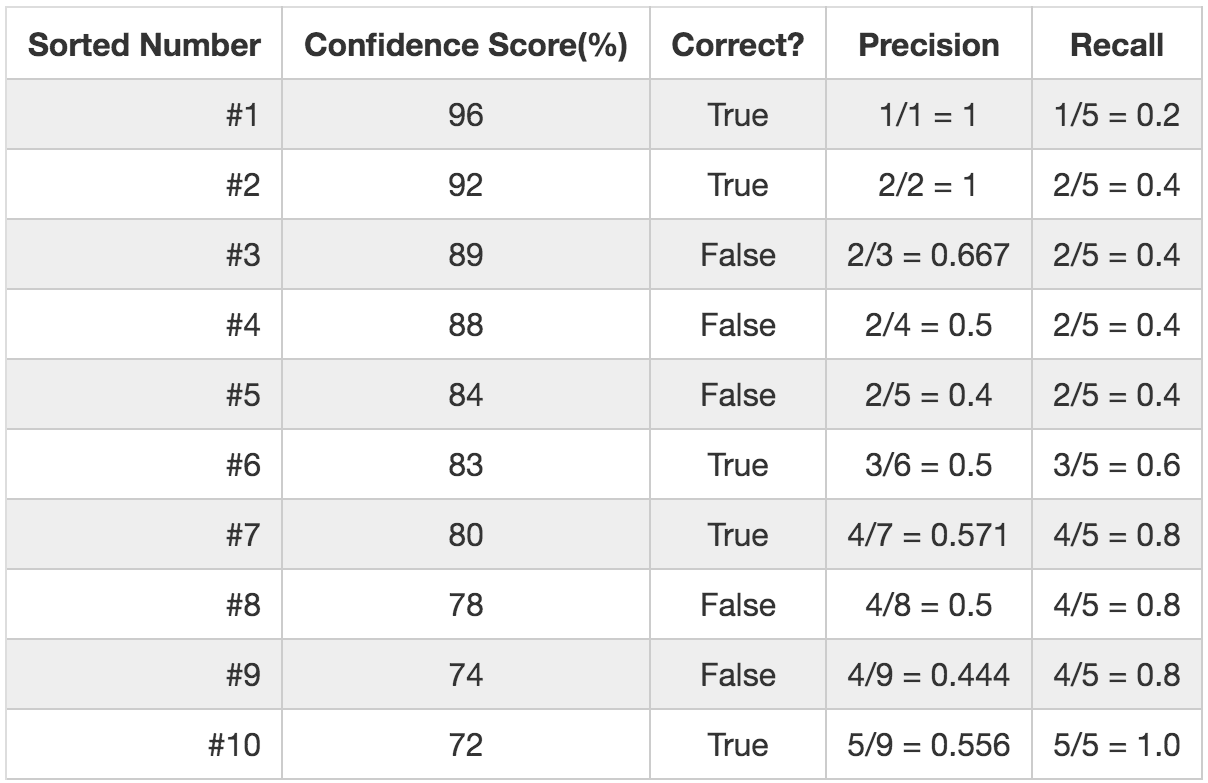

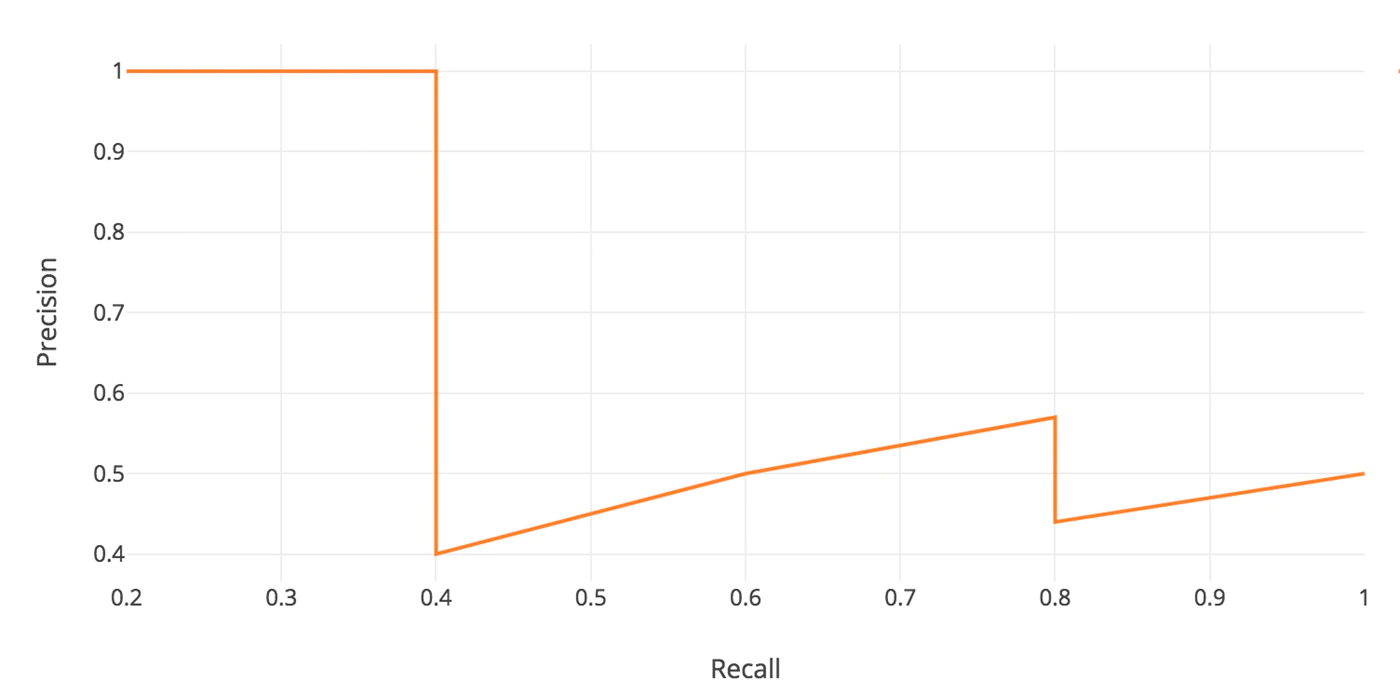

## (8) （アドバンス課題）Faster R-CNNよりも新しい物体検出の論文では、Faster R-CNNがどう引用されているか。